In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [6]:
import pandas as pd

data = {
    'id': [36586735, 36586736, 36586737, 36586738, 36586739],
    'start_time': [
        '2015-08-09 08:00:00+00',
        '2015-08-09 08:15:00+00',
        '2015-08-09 08:30:00+00',
        '2015-08-09 08:45:00+00',
        '2015-08-09 09:00:00+00'
    ],
    'end_time': [
        '2015-08-09 08:15:00+00',
        '2015-08-09 08:30:00+00',
        '2015-08-09 08:45:00+00',
        '2015-08-09 09:00:00+00',
        '2015-08-09 09:15:00+00'
    ],
    'measure_period': ['00:15:00', '00:15:00', '00:15:00', '00:15:00', '00:15:00'],
    'volume': [0, 0, 0, 0, 0],
    'flow_detector_id': [1903, 1903, 1903, 1903, 1903]
}

td = pd.DataFrame(data)
td.to_csv('output.csv', index=False)
td = pd.read_csv('output.csv')
td.head()

,id,start_time,end_time,measure_period,volume,flow_detector_id
0,36586735,2015-08-09 08:00:00+00,2015-08-09 08:15:00+00,00:15:00,0,1903
1,36586736,2015-08-09 08:15:00+00,2015-08-09 08:30:00+00,00:15:00,0,1903
2,36586737,2015-08-09 08:30:00+00,2015-08-09 08:45:00+00,00:15:00,0,1903
3,36586738,2015-08-09 08:45:00+00,2015-08-09 09:00:00+00,00:15:00,0,1903
4,36586739,2015-08-09 09:00:00+00,2015-08-09 09:15:00+00,00:15:00,0,1903


In [7]:
td.tail()

,id,start_time,end_time,measure_period,volume,flow_detector_id
0,36586735,2015-08-09 08:00:00+00,2015-08-09 08:15:00+00,00:15:00,0,1903
1,36586736,2015-08-09 08:15:00+00,2015-08-09 08:30:00+00,00:15:00,0,1903
2,36586737,2015-08-09 08:30:00+00,2015-08-09 08:45:00+00,00:15:00,0,1903
3,36586738,2015-08-09 08:45:00+00,2015-08-09 09:00:00+00,00:15:00,0,1903
4,36586739,2015-08-09 09:00:00+00,2015-08-09 09:15:00+00,00:15:00,0,1903


In [8]:
dif = pd.to_datetime(td['end_time']) - pd.to_datetime(td['start_time'])
(dif == dif[0]).all()

True

In [9]:
td = td.rename(columns={'start_time':'time'}).drop(columns=['end_time','measure_period', 'id'])

In [11]:
data = {
    0: ['detector_description', 'flow_detector_id', 'detector_make', 'detector_name', 'facility_description'],
    1: ['Inbound towards East', 1903, 'EcoCounter', 'Tilikum Crossing 1 EB', 'South bike lane of Tilikum Crossing Bridge'],
    2: ['Inbound towards West', 1904, 'EcoCounter', 'Tilikum Crossing (EAST)', 'North bike lane of Tilikum Crossing Bridge'],
    3: ['Inbound towards West', 1905, 'EcoCounter', 'Tilikum Crossing 2 WB', 'North bike lane of Tilikum Crossing Bridge']
}

tm = pd.DataFrame(data)
tm.to_csv('output.csv', index=False, header=False)

tm = pd.read_csv('output.csv', header=None)
tm.head()



,0,1,2,3
0,detector_description,Inbound towards East,Inbound towards West,Inbound towards West
1,flow_detector_id,1903,1904,1905
2,detector_make,EcoCounter,EcoCounter,EcoCounter
3,detector_name,Tilikum Crossing 1 EB,Tilikum Crossing (EAST),Tilikum Crossing 2 WB
4,facility_description,South bike lane of Tilikum Crossing Bridge,North bike lane of Tilikum Crossing Bridge,North bike lane of Tilikum Crossing Bridge


In [20]:
tm = tm.loc[['detector_description', 'flow_detector_id', 'detector_make', 'detector_name', 'facility_description'], :]

print(tm)

                                                               1  \
0                                                                  
detector_description                        Inbound towards East   
flow_detector_id                                            1903   
detector_make                                         EcoCounter   
detector_name                              Tilikum Crossing 1 EB   
facility_description  South bike lane of Tilikum Crossing Bridge   

                                                               2  \
0                                                                  
detector_description                        Inbound towards West   
flow_detector_id                                            1904   
detector_make                                         EcoCounter   
detector_name                            Tilikum Crossing (EAST)   
facility_description  North bike lane of Tilikum Crossing Bridge   

                                              

In [21]:
(td.flow_detector_id==1904).sum()

0

In [38]:
tE = td.loc[td['flow_detector_id']==1903, ['time', 'volume']]
tE.index = pd.DatetimeIndex(pd.to_datetime(tE['time'])).tz_convert('US/Pacific')
tE = tE.drop(columns=['time']).rename(columns={'volume':'Eastbound'})

In [39]:
tW = td.loc[td['flow_detector_id'] == 1905, ['time', 'volume']]
tW['time'] = pd.to_datetime(tW['time'])
tW['time'] = tW['time'].dt.tz_localize('UTC')
tW['time'] = tW['time'].dt.tz_convert('US/Pacific')
tW.set_index('time', inplace=False)
tW = tW.rename(columns={'volume': 'Westbound'})

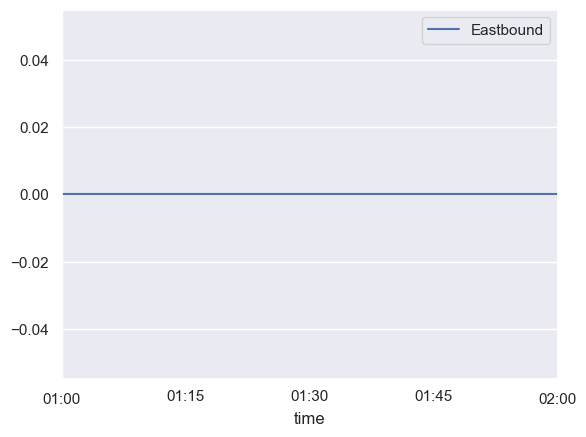

In [43]:
tE.plot();

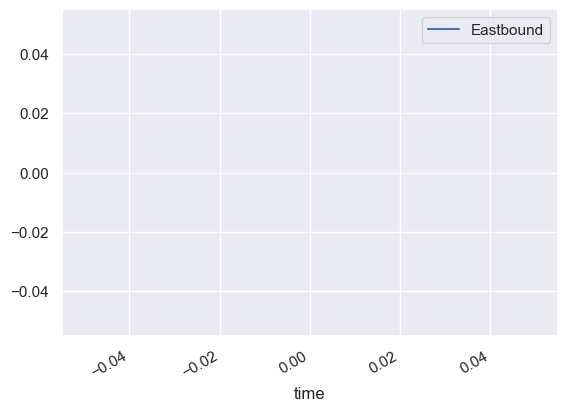

In [44]:
 tE['2018-11-25':'2019-06-01'].plot();

In [45]:
tE['2018-11-25':'2019-06-01'] = np.nan

In [ ]:
tE[tE > 1000] = np.nan
tW[tW > 1000] = np.nan

In [ ]:
t = pd.merge(tE, tW, on='time')
t.plot(alpha=0.7, style=['-',':']);

In [ ]:
t.resample('W').sum().plot(style=['-',':'], title='Weekly bike counts on Tilikum');

In [ ]:
def weekplot(d, onlyweekend=False, title=None):
    weekend = np.where(d.index.weekday < 5, 'Weekday', 'Weekend')
    by_time = d.groupby([weekend, d.index.time]).mean()
    if onlyweekend:
        if title is None: title = 'Bikes per 15-min during weekends'
        by_time.loc['Weekend'].plot(title=title)
        else:
            if title is None: title = 'Bikes per 15-min during weekdays'
            by_time.loc['Weekday'].plot(title=title)
weekplot(t)

In [ ]:
weekplot(t, onlyweekend=True)

In [ ]:
weekplot(t.loc[:'2020-03-17'], title='Before social distancing')

In [ ]:
weekplot(t.loc['2020-03-17':], title='After social distancing')

In [ ]:
t.loc[:'2020-03-17'].mean() - t.loc['2020-03-17':].mean()

In [ ]:
t.loc[:'2020-03-17'].resample('W').sum().mean() - t.loc['2020-03-17':].resample('W').sum().mean()

In [55]:
import os
import shutil
import urllib

url = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"
f = "C:/Users/saika/Fremont_Bridge_Bicycle_Counter.csv"

# Create directory if it doesn't exist
os.makedirs(os.path.dirname(f), exist_ok=True)

# Download the file if it doesn't exist
if not os.path.exists(f):
    with urllib.request.urlopen(url) as response, open(f, 'wb') as out_file:
        shutil.copyfileobj(response, out_file)


In [56]:
sd = pd.read_csv(f)
sd.tail()

,Date,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk"
95635,08/31/2023 07:00:00 PM,224.0,72.0,152.0
95636,08/31/2023 08:00:00 PM,142.0,59.0,83.0
95637,08/31/2023 09:00:00 PM,67.0,35.0,32.0
95638,08/31/2023 10:00:00 PM,43.0,18.0,25.0
95639,08/31/2023 11:00:00 PM,12.0,8.0,4.0


In [ ]:
sd = sd.rename(columns={'Date' : 'time',
                        'Fremont Bridge East Sidewalk' : 'East',
                        'Fremont Bridge West Sidewalk' : 'West'})
sd.index = pd.to_datetime(sd.loc[:, 'time'])
sd = sd.drop(columns=['time', 'Fremont Bridge Total'])
sd.head()

In [ ]:
th = t.resample('H').sum()
th.describe() # Portland's Tilikum

In [ ]:
sd.describe() # Seattle's Fremont

In [ ]:
sw = sd.resample('W').sum()
tw = t.resample('W').sum()
fig, axs = plt.subplots(1, 2, figsize=(13, 3), sharey=True)
plt.subplots_adjust(wspace=0.05)

In [ ]:
sw.plot(ax=axs[0], title='Fremont bridge (Seattle) bikes/week');
tw.plot(ax=axs[1], title='Tilikum bridge (Portland) bikes/week');

In [ ]:
weekplot(sd, title='Fremont (Seattle) on weekdays (Bikes/hr)')
weekplot(th, title='Tilikum (Portland) on weekdays (Bikes/hr)')

In [ ]:
weekplot(sd['2020-03-17':], title='Fremont (Seattle): Weekdays after social distancing'); plt.ylabel('Bikes/hour');
weekplot(th['2020-03-17':], title='Tilikum (Portland): Weekdays after social distancing'); plt.ylabel('Bikes/hour');